In [1]:
import torch
import pandas as pd

In [ ]:
train_df = pd.read_csv(r"\data\train.csv")
train_df

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo
0,2694,175,2,2,2,151,73,6,Чудесного всем утра&#33;<br><br>#ShuiLongYin #...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,21688,58,2,8,944,1595,1102,51,&#127802; ЦВЕТЫ ПРОТИВ ВРЕДИТЕЛЕЙ: КРАСОТА С П...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,93784,1225,14,34,86,6370,4755,457,"Моя волшебная коробочка, которая помогает заня...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,15430,68,11,0,8,1520,428,25,Состояние дороги в деревню Стешевская (Корбозеро),/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,13578,284,1,30,4,189,28,9,&#128247;aiartistically,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
...,...,...,...,...,...,...,...,...,...,...
19995,16469,235,8,6,41,650,82,207,"&#9989;Травы, которые понижают давление&#33; В...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
19996,6394,89,0,0,0,72,1,60,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
19997,6717,196,0,1,0,133,5,27,Лойс если ждёшь &#128077;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
19998,5501,14,0,0,0,33,1,1,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [3]:
import html
import re
train_df["text"] = train_df["text"].fillna("Неизвестно")
train_df["text"] = train_df["text"].apply(lambda x: html.unescape(x))

# train_df["text"] = train_df["text"].apply(lambda x: re.sub(r'\[[^\]]*\]', '', x))
train_df['hashtag_count'] = train_df['text'].str.findall(r'#\S+').str.len()

train_df['br_count'] = train_df['text'].str.count(r'<br\s*/?>')
train_df['text'] = train_df['text'].str.replace(r'<\.\.\.>', '...', regex=True)
train_df['text'] = train_df['text'].str.replace(r'<\…\>', '...', regex=True)
train_df['text'] = train_df['text'].str.replace(r'<br\s*/?>', ' ', regex=True)
train_df['text'] = train_df['text'].str.replace(r' {2,}', ' ', regex=True)
train_df['text_len'] = train_df['text'].str.len()


train_df

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo,hashtag_count,br_count,text_len
0,2694,175,2,2,2,151,73,6,Чудесного всем утра! #ShuiLongYin #WaterDragon...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,4,2,75
1,21688,58,2,8,944,1595,1102,51,🌺 ЦВЕТЫ ПРОТИВ ВРЕДИТЕЛЕЙ: КРАСОТА С ПОЛЬЗОЙ 🌺...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,68,7091
2,93784,1225,14,34,86,6370,4755,457,"Моя волшебная коробочка, которая помогает заня...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,78
3,15430,68,11,0,8,1520,428,25,Состояние дороги в деревню Стешевская (Корбозеро),/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,49
4,13578,284,1,30,4,189,28,9,📷aiartistically,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,16469,235,8,6,41,650,82,207,"✅Травы, которые понижают давление! Вы навсегда...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,92
19996,6394,89,0,0,0,72,1,60,Неизвестно,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,10
19997,6717,196,0,1,0,133,5,27,Лойс если ждёшь 👍,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,17
19998,5501,14,0,0,0,33,1,1,Неизвестно,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,10


In [4]:
for i in train_df.columns:
    print(i, train_df[i].isna().sum())

view 0
like 0
comment 0
hide 0
expand 0
open_photo 0
open 0
share_to_message 0
text 0
photo 0
hashtag_count 0
br_count 0
text_len 0


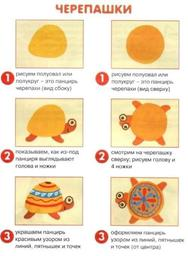

In [5]:
from PIL import Image
from io import BytesIO
import base64
Image.open(BytesIO(base64.b64decode(train_df.loc[11111].photo)))

In [6]:
from transformers import AutoTokenizer, AutoModel
import numpy as np
from tqdm import tqdm

def get_rubert_embeddings(
    texts: list[str],
    model_name: str = "DeepPavlov/rubert-base-cased",  # лёгкий, быстрый
    batch_size: int = 64,
    device: str = "cuda" if torch.cuda.is_available() else "cpu"
) -> np.ndarray:
    """
    Извлекает эмбеддинги из ruBERT.
    В texts не должно быть пропущенных значений.

    Варианты моделей по весу/качеству:
    - "cointegrated/rubert-tiny2"           ~30MB, быстрый
    - "DeepPavlov/rubert-base-cased"        ~700MB, хороший
    - "sberbank-ai/sbert_large_nlu_ru"      ~1.3GB, лучший
    - "intfloat/multilingual-e5-large"      ~2GB, мультиязычный
    """
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModel.from_pretrained(model_name).to(device)
    model.eval()

    all_embeddings = []

    for i in tqdm(range(0, len(texts), batch_size), desc="ruBERT"):
        batch = texts[i : i + batch_size]

        # Токенизация
        encoded = tokenizer(
            batch,
            padding=True,
            truncation=True,
            max_length=512,
            return_tensors="pt",
        ).to(device)

        # Инференс (без градиентов — быстрее и меньше памяти)
        with torch.no_grad():
            output = model(**encoded)

        # Mean pooling — усредняем все токены (лучше, чем [CLS] токен)
        attention_mask = encoded["attention_mask"]
        token_embeddings = output.last_hidden_state
        input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        embeddings = (
            torch.sum(token_embeddings * input_mask_expanded, dim=1)
            / torch.clamp(input_mask_expanded.sum(dim=1), min=1e-9)
        )

        all_embeddings.append(embeddings.cpu().numpy())

    return np.vstack(all_embeddings)  # (N, 768)


# Использование
texts = train_df["text"].to_list()
# text_emb = get_rubert_embeddings(texts)

# Сохрани — не нужно считать каждый раз!
# np.save("text_emb_train4_2_bad.npy", text_emb)
# Загрузка: 
text_emb = np.load("text_emb_train4_2_bad.npy")

In [7]:
text_emb

array([[-0.17141445, -0.10774418,  0.39150405, ...,  1.2793084 ,
         0.36181727, -0.39684415],
       [ 0.22003117, -0.09582542,  0.28441948, ...,  0.3275083 ,
        -0.07424967, -0.36573684],
       [ 0.46915594, -0.04056454, -0.03914494, ...,  0.5394396 ,
         0.24935143, -0.28640077],
       ...,
       [ 0.30895913, -0.03445771,  0.02658882, ..., -0.08279745,
         0.23336509,  0.11410485],
       [ 0.2139535 ,  0.12771636, -0.06092709, ..., -0.2536883 ,
        -0.10665611, -0.13814025],
       [ 0.2139535 ,  0.12771636, -0.06092709, ..., -0.2536883 ,
        -0.10665611, -0.13814025]], shape=(20000, 768), dtype=float32)

In [8]:
import torch
import clip
from PIL import Image
import numpy as np
from tqdm import tqdm

def get_clip_embeddings(
    image_paths: list[str],
    model_name: str = "ViT-B/32",   # или "ViT-L/14" (лучше, но тяжелее)
    batch_size: int = 32,
    device: str = "cuda" if torch.cuda.is_available() else "cpu"
) -> np.ndarray:
    """
    CLIP — умеет понимать связь текста и картинок.
    Эмбеддинги картинок и описаний оказываются близки в одном пространстве.

    Модели:
    - "ViT-B/32"  — быстрый, ~300MB
    - "ViT-B/16"  — лучше, ~300MB
    - "ViT-L/14"  — самый точный, ~900MB
    """
    model, preprocess = clip.load(model_name, device=device)
    model.eval()
    all_embeddings = []

    for i in tqdm(range(0, len(image_paths), batch_size), desc="CLIP"):
        batch_paths = image_paths[i : i + batch_size]
        images = torch.stack([
            preprocess(p)
            for p in batch_paths
        ]).to(device)

        with torch.no_grad():
            emb = model.encode_image(images)

        all_embeddings.append(emb.cpu().numpy())

    return np.vstack(all_embeddings)  # (N, 512)


# Если картинки в base64 (как в НТО 2025)
import base64
import io

def decode_base64_image(b64_string: str) -> Image.Image:
    img_bytes = base64.b64decode(b64_string)
    return Image.open(io.BytesIO(img_bytes)).convert("RGB")



In [9]:
# img_emb = get_clip_embeddings(
#     [
#         decode_base64_image(i) for i in train_df["photo"].tolist()
#     ]
# )

# Сохрани — не нужно считать каждый раз!
# np.save("img_emb_train1.npy", img_emb)
# Загрузка: 
img_emb = np.load("img_emb_train1.npy")
img_emb

array([[-0.2786 ,  0.1294 ,  0.0482 , ...,  0.676  , -0.354  , -0.254  ],
       [ 0.217  ,  0.4011 , -0.3494 , ...,  0.3586 ,  0.2432 , -0.2147 ],
       [-0.092  ,  0.2443 , -0.2783 , ...,  0.649  ,  0.1469 ,  0.3237 ],
       ...,
       [ 0.05637, -0.1954 , -0.351  , ..., -0.513  , -0.1515 , -0.295  ],
       [-0.7837 ,  0.116  , -0.5176 , ..., -0.1174 , -0.1819 ,  0.0314 ],
       [-0.4688 ,  0.122  , -0.1203 , ...,  0.1317 ,  0.1721 , -0.358  ]],
      shape=(20000, 512), dtype=float16)

In [10]:
train_df = pd.concat([train_df, 
                      pd.DataFrame(text_emb, columns=[f"text_{i}" for i in range((text_emb.shape[1]))]), 
                      pd.DataFrame(img_emb, columns=[f"img_{i}" for i in range((img_emb.shape[1]))])], axis=1)
train_df

AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo,...,img_502,img_503,img_504,img_505,img_506,img_507,img_508,img_509,img_510,img_511
0,2694,175,2,2,2,151,73,6,Чудесного всем утра! #ShuiLongYin #WaterDragon...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,-0.029892,0.134033,0.166382,0.041626,-0.287354,0.284668,0.164795,0.675781,-0.354004,-0.253906
1,21688,58,2,8,944,1595,1102,51,🌺 ЦВЕТЫ ПРОТИВ ВРЕДИТЕЛЕЙ: КРАСОТА С ПОЛЬЗОЙ 🌺...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,-0.142578,0.148438,0.742188,0.255127,0.259277,0.553223,-0.232544,0.358643,0.243164,-0.214722
2,93784,1225,14,34,86,6370,4755,457,"Моя волшебная коробочка, которая помогает заня...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,-0.612305,0.446533,0.634766,-0.111755,-0.387939,-0.398926,0.228394,0.648926,0.146851,0.323730
3,15430,68,11,0,8,1520,428,25,Состояние дороги в деревню Стешевская (Корбозеро),/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,-0.419189,0.242065,0.475830,0.180054,0.363770,-0.338867,-0.409180,0.387451,-0.395752,0.105042
4,13578,284,1,30,4,189,28,9,📷aiartistically,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.511719,-0.187500,-0.686523,0.417480,-0.157104,0.271484,0.067871,0.190430,0.013763,0.038086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,16469,235,8,6,41,650,82,207,"✅Травы, которые понижают давление! Вы навсегда...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,0.038818,0.022949,-0.042450,0.341553,0.206909,0.024612,-0.137329,0.582031,-0.201782,-0.123901
19996,6394,89,0,0,0,72,1,60,Неизвестно,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,-0.014153,-0.148071,0.595703,0.356934,-0.075012,0.280518,0.207031,-0.452881,-0.177002,-0.115723
19997,6717,196,0,1,0,133,5,27,Лойс если ждёшь 👍,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,-0.236206,-0.075989,0.110168,-0.133057,0.082886,0.235352,0.142456,-0.513184,-0.151489,-0.294922
19998,5501,14,0,0,0,33,1,1,Неизвестно,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,...,-0.112793,-0.299805,0.226196,0.273438,0.109375,0.171753,0.026550,-0.117371,-0.181885,0.031403


In [11]:
# # print(np.array(train_df.columns))
# # y_train = train_df[["like", "comment", "hide", "expand", "open_photo", "open", "share_to_message"]]
# y_train = train_df[["like"]]
# X_train = train_df.drop(["like", "comment", "hide", "expand", "open_photo", "open", "share_to_message", "text", "photo"], axis=1)
# X_train

In [12]:
# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# X_train

In [13]:
# from catboost import CatBoostClassifier, CatBoostRegressor, Pool
# from sklearn.model_selection import KFold, StratifiedKFold

# # CatBoost лучше LightGBM когда:
# # - Много категориальных признаков (автоматический Target Encoding)
# # - Нужна интерпретируемость (SHAP встроен)
# # - Данные с шумом (более устойчив к переобучению)

# # CatBoost хуже LightGBM когда:
# # - Признаки — эмбеддинги (много числовых колонок → медленно)
# # - Train и test из разных распределений

# cat_params = {
#     "iterations": 10000,
#     "learning_rate": 0.05,
#     "depth": 6,
#     "l2_leaf_reg": 3,
#     "loss_function": "RMSE",       # или "Logloss", "MultiClass"
#     "eval_metric": "RMSE",
#     "random_seed": 42,
#     "verbose": 200,
#     "early_stopping_rounds": 100,
# }

# # С категориальными признаками
# # cat_features = ["category", "city", "language"]

# # def train_catboost_kfold(X_train, y_train, X_test, cat_features=None, n_folds=5):
# #     kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
# #     oof_preds  = np.zeros(len(X_train))
# #     test_preds = np.zeros(len(X_test))

# #     for fold, (tr_idx, val_idx) in enumerate(kf.split(X_train)):
# #         model = CatBoostRegressor(**cat_params)
# #         model.fit(
# #             X_train[tr_idx], y_train[tr_idx],
# #             eval_set=(X_train[val_idx], y_train[val_idx]),
# #             cat_features=cat_features,
# #             verbose=False,
# #         )
# #         oof_preds[val_idx] = model.predict(X_train[val_idx])
# #         test_preds += model.predict(X_test) / n_folds

# #     return model, oof_preds, test_preds




# # model = CatBoostRegressor(**cat_params)

# model = CatBoostRegressor(**cat_params, task_type="GPU")
# # model.load_model("model_1.cbm")
# model.fit(
#             X_train, y_train,
#             eval_set=(X_val, y_val),
#             # cat_features=cat_features,
#             verbose=True
# )

In [14]:
# feature_importance = model.get_feature_importance()
# feature_names = X_train.columns.tolist()

# # Create DataFrame
# importance_df = pd.DataFrame({
#     'feature': feature_names,
#     'importance': feature_importance
# }).sort_values('importance', ascending=False)
# importance_df

In [15]:
# # # Нативный формат CatBoost
# model.save_model("model_2.cbm")

In [ ]:
test_df = pd.read_csv(r"\data\test.csv")
test_df

,view,text,photo
0,2123,#традиции<br>На Руси стирать белье можно было ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,2298,"Сдам без посредников: 1-комнатная квартира, 37...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,14855,Воронежцы обратили внимание на новые терминалы...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,3451,&#9889;В Госдуме предложили создать «электроса...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,7620,Вот так надо&#33;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
...,...,...,...
3522,7574,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3523,6649,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3524,1545,"Ни для кого не секрет, что такие клубы, как «А...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3525,4972,ИЗБАВИТЬСЯ ОТ БЕД&#33;<br>Берёте клубок чёрных...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [ ]:
# test_df["text"] = test_df["text"].fillna("Неизвестно")
# test_df["text"] = test_df["text"].apply(lambda x: html.unescape(x))
# test_df['hashtag_count'] = test_df['text'].str.findall(r'#\S+').str.len()

test_df["text"] = test_df["text"].fillna("Неизвестно")
test_df["text"] = test_df["text"].apply(lambda x: html.unescape(x))

# train_df["text"] = train_df["text"].apply(lambda x: re.sub(r'\[[^\]]*\]', '', x))
test_df['hashtag_count'] = test_df['text'].str.findall(r'#\S+').str.len()

test_df['br_count'] = test_df['text'].str.count(r'<br\s*/?>')
test_df['text'] = test_df['text'].str.replace(r'<\.\.\.>', '...', regex=True)
test_df['text'] = test_df['text'].str.replace(r'<\…\>', '...', regex=True)
test_df['text'] = test_df['text'].str.replace(r'<br\s*/?>', ' ', regex=True)
test_df['text'] = test_df['text'].str.replace(r' {2,}', ' ', regex=True)
test_df['text_len'] = test_df['text'].str.len()

texts = test_df["text"].to_list()
# test_text_emb = get_rubert_embeddings(texts)


# Сохрани — не нужно считать каждый раз!
# np.save("realtest_text_emb_train4_bad.npy", test_text_emb)
# Загрузка: 
test_text_emb = np.load("realtest_text_emb_train4_bad.npy")


Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
ruBERT: 100%|██████████| 56/56 [00:52<00:00,  1.06it/s]


In [59]:
test_text_emb

array([[ 0.04213792, -0.43317357,  0.55344564, ...,  0.32310247,
        -0.01998284, -0.26845846],
       [-0.3356559 , -0.47068334,  0.452846  , ...,  0.859383  ,
         0.36501524, -0.149336  ],
       [-0.35373837, -0.5777965 ,  0.65561974, ...,  0.291071  ,
         0.4962257 , -0.12988588],
       ...,
       [ 0.19213337,  0.07775253, -0.18097736, ...,  0.79965526,
         0.11725367, -0.7450481 ],
       [ 0.17189212, -0.1415769 , -0.08981314, ...,  0.57825136,
         0.04719811, -0.44224283],
       [ 0.2139535 ,  0.12771636, -0.06092709, ..., -0.2536883 ,
        -0.10665611, -0.13814025]], shape=(3527, 768), dtype=float32)

In [60]:
# test_img_emb = get_clip_embeddings(
#     [
#         decode_base64_image(i) for i in test_df["photo"].tolist()
#     ]
# )

# Сохрани — не нужно считать каждый раз!
# np.save("realtest_img_emb_train2.npy", test_img_emb)
# Загрузка: 
test_img_emb = np.load("realtest_img_emb_train2.npy")
test_img_emb

CLIP: 100%|██████████| 111/111 [00:11<00:00,  9.35it/s]


array([[ 0.3203  , -0.1993  , -0.0939  , ...,  0.04562 , -0.3567  ,
        -0.003357],
       [-0.3174  ,  0.0205  ,  0.08386 , ...,  0.4785  ,  0.01472 ,
         0.3464  ],
       [ 0.04987 ,  0.7124  ,  0.01659 , ...,  0.11304 , -0.0822  ,
         0.1692  ],
       ...,
       [-0.4514  ,  0.4307  , -0.361   , ...,  0.258   ,  0.1575  ,
         0.0516  ],
       [-0.05353 , -0.436   , -0.004635, ...,  0.2454  ,  0.02596 ,
         0.4136  ],
       [-0.1982  ,  0.0915  ,  0.0762  , ...,  0.4663  , -0.01303 ,
        -0.0417  ]], shape=(3527, 512), dtype=float16)

In [61]:
test_df

,view,text,photo,hashtag_count,br_count,text_len
0,2123,#традиции На Руси стирать белье можно было дом...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,1,1,318
1,2298,"Сдам без посредников: 1-комнатная квартира, 37...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,2,9,559
2,14855,Воронежцы обратили внимание на новые терминалы...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,6,428
3,3451,⚡В Госдуме предложили создать «электросамокатн...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,2,244
4,7620,Вот так надо!,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,13
...,...,...,...,...,...,...
3522,7574,Неизвестно,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,10
3523,6649,Неизвестно,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,10
3524,1545,"Ни для кого не секрет, что такие клубы, как «А...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,2,2,294
3525,4972,ИЗБАВИТЬСЯ ОТ БЕД! Берёте клубок чёрных ниток ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,17,1721


In [62]:
test_text_emb

array([[ 0.04213792, -0.43317357,  0.55344564, ...,  0.32310247,
        -0.01998284, -0.26845846],
       [-0.3356559 , -0.47068334,  0.452846  , ...,  0.859383  ,
         0.36501524, -0.149336  ],
       [-0.35373837, -0.5777965 ,  0.65561974, ...,  0.291071  ,
         0.4962257 , -0.12988588],
       ...,
       [ 0.19213337,  0.07775253, -0.18097736, ...,  0.79965526,
         0.11725367, -0.7450481 ],
       [ 0.17189212, -0.1415769 , -0.08981314, ...,  0.57825136,
         0.04719811, -0.44224283],
       [ 0.2139535 ,  0.12771636, -0.06092709, ..., -0.2536883 ,
        -0.10665611, -0.13814025]], shape=(3527, 768), dtype=float32)

In [63]:
test_img_emb

array([[ 0.3203  , -0.1993  , -0.0939  , ...,  0.04562 , -0.3567  ,
        -0.003357],
       [-0.3174  ,  0.0205  ,  0.08386 , ...,  0.4785  ,  0.01472 ,
         0.3464  ],
       [ 0.04987 ,  0.7124  ,  0.01659 , ...,  0.11304 , -0.0822  ,
         0.1692  ],
       ...,
       [-0.4514  ,  0.4307  , -0.361   , ...,  0.258   ,  0.1575  ,
         0.0516  ],
       [-0.05353 , -0.436   , -0.004635, ...,  0.2454  ,  0.02596 ,
         0.4136  ],
       [-0.1982  ,  0.0915  ,  0.0762  , ...,  0.4663  , -0.01303 ,
        -0.0417  ]], shape=(3527, 512), dtype=float16)

In [64]:
test_img_emb.shape[1]

512

In [65]:
test_df = pd.concat([test_df, 
                      pd.DataFrame(test_text_emb, columns=[f"text_{i}" for i in range((test_text_emb.shape[1]))]), 
                      pd.DataFrame(test_img_emb, columns=[f"img_{i}" for i in range((test_img_emb.shape[1]))])], axis=1)
test_df

AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,view,text,photo,hashtag_count,br_count,text_len,text_0,text_1,text_2,text_3,...,img_502,img_503,img_504,img_505,img_506,img_507,img_508,img_509,img_510,img_511
0,2123,#традиции На Руси стирать белье можно было дом...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,1,1,318,0.042138,-0.433174,0.553446,-0.406269,...,0.003223,-0.216919,0.119385,0.109863,0.295654,-0.019272,0.010162,0.045624,-0.356689,-0.003357
1,2298,"Сдам без посредников: 1-комнатная квартира, 37...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,2,9,559,-0.335656,-0.470683,0.452846,-0.874352,...,0.224731,-0.166626,-0.142944,0.637695,0.202515,-0.038849,-0.357178,0.478516,0.014717,0.346436
2,14855,Воронежцы обратили внимание на новые терминалы...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,6,428,-0.353738,-0.577797,0.655620,-0.672605,...,0.098450,0.073792,0.256836,-0.074402,0.271729,-0.351562,-0.074219,0.113037,-0.082214,0.169189
3,3451,⚡В Госдуме предложили создать «электросамокатн...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,2,244,0.179278,-0.300593,0.467256,0.112396,...,0.205566,0.141968,-0.488770,-0.008583,-0.255371,-0.385010,-0.287109,0.503418,-0.130981,0.025833
4,7620,Вот так надо!,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,13,0.381752,0.185136,-0.131607,0.183077,...,0.163452,-0.042267,0.506348,0.090149,0.055725,0.091797,0.231323,0.358398,-0.157471,-0.081299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,7574,Неизвестно,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,10,0.213953,0.127716,-0.060927,-0.011661,...,0.175171,-0.109070,0.735840,0.443359,0.082825,0.071838,-0.148926,0.391357,-0.281006,-0.153931
3523,6649,Неизвестно,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,0,10,0.213953,0.127716,-0.060927,-0.011661,...,-0.364014,-0.290527,0.460938,-0.061340,0.188354,0.041992,-0.354980,-0.191162,-0.299072,0.020126
3524,1545,"Ни для кого не секрет, что такие клубы, как «А...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,2,2,294,0.192133,0.077753,-0.180977,-0.047843,...,0.310303,0.254639,0.311523,0.389893,0.719238,-0.045197,0.151001,0.258057,0.157471,0.051605
3525,4972,ИЗБАВИТЬСЯ ОТ БЕД! Берёте клубок чёрных ниток ...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0,17,1721,0.171892,-0.141577,-0.089813,0.035641,...,-0.109802,-0.131104,0.348389,0.234131,0.433105,0.262939,0.010063,0.245361,0.025955,0.413574


In [66]:
test_df["text_1"]

0      -0.433174
1      -0.470683
2      -0.577797
3      -0.300593
4       0.185136
          ...   
3522    0.127716
3523    0.127716
3524    0.077753
3525   -0.141577
3526    0.127716
Name: text_1, Length: 3527, dtype: float32

In [67]:
(test_df.columns.value_counts() != 1).any()

np.False_

In [68]:
X_test = test_df.drop(["text", "photo"],axis=1)
X_test

AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,view,hashtag_count,br_count,text_len,text_0,text_1,text_2,text_3,text_4,text_5,...,img_502,img_503,img_504,img_505,img_506,img_507,img_508,img_509,img_510,img_511
0,2123,1,1,318,0.042138,-0.433174,0.553446,-0.406269,-0.141160,0.094791,...,0.003223,-0.216919,0.119385,0.109863,0.295654,-0.019272,0.010162,0.045624,-0.356689,-0.003357
1,2298,2,9,559,-0.335656,-0.470683,0.452846,-0.874352,-0.077170,0.188535,...,0.224731,-0.166626,-0.142944,0.637695,0.202515,-0.038849,-0.357178,0.478516,0.014717,0.346436
2,14855,0,6,428,-0.353738,-0.577797,0.655620,-0.672605,-0.347516,-0.487904,...,0.098450,0.073792,0.256836,-0.074402,0.271729,-0.351562,-0.074219,0.113037,-0.082214,0.169189
3,3451,0,2,244,0.179278,-0.300593,0.467256,0.112396,0.052086,-0.215195,...,0.205566,0.141968,-0.488770,-0.008583,-0.255371,-0.385010,-0.287109,0.503418,-0.130981,0.025833
4,7620,0,0,13,0.381752,0.185136,-0.131607,0.183077,0.526982,0.095948,...,0.163452,-0.042267,0.506348,0.090149,0.055725,0.091797,0.231323,0.358398,-0.157471,-0.081299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,7574,0,0,10,0.213953,0.127716,-0.060927,-0.011661,0.536358,-0.109626,...,0.175171,-0.109070,0.735840,0.443359,0.082825,0.071838,-0.148926,0.391357,-0.281006,-0.153931
3523,6649,0,0,10,0.213953,0.127716,-0.060927,-0.011661,0.536358,-0.109626,...,-0.364014,-0.290527,0.460938,-0.061340,0.188354,0.041992,-0.354980,-0.191162,-0.299072,0.020126
3524,1545,2,2,294,0.192133,0.077753,-0.180977,-0.047843,0.107207,-0.007402,...,0.310303,0.254639,0.311523,0.389893,0.719238,-0.045197,0.151001,0.258057,0.157471,0.051605
3525,4972,0,17,1721,0.171892,-0.141577,-0.089813,0.035641,0.255434,0.321546,...,-0.109802,-0.131104,0.348389,0.234131,0.433105,0.262939,0.010063,0.245361,0.025955,0.413574


In [69]:
# print(np.array(train_df.columns))
# y_train = train_df[["like", "comment", "hide", "expand", "open_photo", "open", "share_to_message"]]

from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.model_selection import KFold, StratifiedKFold
targets = ["like", "comment", "hide", "expand", "open_photo", "open", "share_to_message"]

predictions = pd.DataFrame()

for i in targets:
    y_train = train_df[[i]]
    X_train = train_df.drop(["like", "comment", "hide", "expand", "open_photo", "open", "share_to_message", "text", "photo"], axis=1)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    cat_params = {
        "iterations": 10000,
        "learning_rate": 0.05,
        "depth": 6,
        "l2_leaf_reg": 3,
        "loss_function": "RMSE",       # или "Logloss", "MultiClass"
        "eval_metric": "RMSE",
        "random_seed": 42,
        "verbose": 200,
        "early_stopping_rounds": 100,
    }


    # model = CatBoostRegressor(**cat_params)

    model = CatBoostRegressor(**cat_params, task_type="GPU")
    # model.load_model("model_1.cbm")
    model.fit(
                X_train, y_train,
                eval_set=(X_val, y_val),
                # cat_features=cat_features,
                verbose=True
    )

    # Нативный формат CatBoost
    model.save_model(f"model_2_{i}.cbm")
    
    test_preds = model.predict(X_test)
    # print(test_preds)
    predictions[i] = test_preds
    feature_importance = model.get_feature_importance()
    feature_names = X_train.columns.tolist()

    # Create DataFrame
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    print(importance_df)
    # break

predictions

0:	learn: 1301.7419468	test: 1573.5524548	best: 1573.5524548 (0)	total: 121ms	remaining: 20m 8s
1:	learn: 1280.2995649	test: 1562.4192114	best: 1562.4192114 (1)	total: 217ms	remaining: 18m 2s
2:	learn: 1258.0880478	test: 1549.2844697	best: 1549.2844697 (2)	total: 307ms	remaining: 17m 2s
3:	learn: 1236.0484651	test: 1534.1840098	best: 1534.1840098 (3)	total: 393ms	remaining: 16m 21s
4:	learn: 1215.6182559	test: 1524.6954004	best: 1524.6954004 (4)	total: 487ms	remaining: 16m 14s
5:	learn: 1199.1248008	test: 1519.3521146	best: 1519.3521146 (5)	total: 575ms	remaining: 15m 58s
6:	learn: 1181.9608928	test: 1508.0737170	best: 1508.0737170 (6)	total: 660ms	remaining: 15m 42s
7:	learn: 1166.5591112	test: 1499.6254679	best: 1499.6254679 (7)	total: 757ms	remaining: 15m 45s
8:	learn: 1149.8256146	test: 1495.4980976	best: 1495.4980976 (8)	total: 846ms	remaining: 15m 38s
9:	learn: 1132.9747323	test: 1485.6520831	best: 1485.6520831 (9)	total: 927ms	remaining: 15m 26s
10:	learn: 1118.7042219	test: 147

0:	learn: 74.0339989	test: 40.5462020	best: 40.5462020 (0)	total: 98.8ms	remaining: 16m 27s
1:	learn: 73.1117330	test: 40.4178612	best: 40.4178612 (1)	total: 192ms	remaining: 16m
2:	learn: 72.0052498	test: 40.2105008	best: 40.2105008 (2)	total: 281ms	remaining: 15m 36s
3:	learn: 71.7482439	test: 40.0855663	best: 40.0855663 (3)	total: 377ms	remaining: 15m 42s
4:	learn: 71.2904517	test: 39.9705220	best: 39.9705220 (4)	total: 464ms	remaining: 15m 28s
5:	learn: 70.8289912	test: 39.8025612	best: 39.8025612 (5)	total: 552ms	remaining: 15m 19s
6:	learn: 70.4698730	test: 39.7444807	best: 39.7444807 (6)	total: 649ms	remaining: 15m 25s
7:	learn: 69.5706583	test: 39.6548957	best: 39.6548957 (7)	total: 737ms	remaining: 15m 19s
8:	learn: 68.3718180	test: 39.6109249	best: 39.6109249 (8)	total: 829ms	remaining: 15m 20s
9:	learn: 67.9499926	test: 39.4593097	best: 39.4593097 (9)	total: 916ms	remaining: 15m 14s
10:	learn: 67.1255317	test: 39.3956660	best: 39.3956660 (10)	total: 1.01s	remaining: 15m 13s


0:	learn: 40.3949533	test: 47.4296374	best: 47.4296374 (0)	total: 92.4ms	remaining: 15m 23s
1:	learn: 39.6938345	test: 46.9287412	best: 46.9287412 (1)	total: 177ms	remaining: 14m 43s
2:	learn: 38.9757537	test: 46.5073086	best: 46.5073086 (2)	total: 257ms	remaining: 14m 14s
3:	learn: 38.2980499	test: 46.0414813	best: 46.0414813 (3)	total: 338ms	remaining: 14m 5s
4:	learn: 37.6569648	test: 45.7733438	best: 45.7733438 (4)	total: 430ms	remaining: 14m 20s
5:	learn: 36.9929503	test: 45.2654104	best: 45.2654104 (5)	total: 514ms	remaining: 14m 16s
6:	learn: 36.4103402	test: 44.8341318	best: 44.8341318 (6)	total: 592ms	remaining: 14m 5s
7:	learn: 35.9340403	test: 44.6678772	best: 44.6678772 (7)	total: 680ms	remaining: 14m 9s
8:	learn: 35.4268013	test: 44.4340213	best: 44.4340213 (8)	total: 762ms	remaining: 14m 5s
9:	learn: 34.9352848	test: 44.2491455	best: 44.2491455 (9)	total: 845ms	remaining: 14m 3s
10:	learn: 34.4412326	test: 44.0472928	best: 44.0472928 (10)	total: 928ms	remaining: 14m 2s
11

0:	learn: 5734.5428554	test: 15887.0705227	best: 15887.0705227 (0)	total: 94.2ms	remaining: 15m 42s
1:	learn: 5589.8914938	test: 15842.5574663	best: 15842.5574663 (1)	total: 193ms	remaining: 16m 6s
2:	learn: 5449.4878203	test: 15726.7396769	best: 15726.7396769 (2)	total: 297ms	remaining: 16m 28s
3:	learn: 5334.6541511	test: 15714.8019335	best: 15714.8019335 (3)	total: 403ms	remaining: 16m 45s
4:	learn: 5205.0808901	test: 15610.5475071	best: 15610.5475071 (4)	total: 493ms	remaining: 16m 25s
5:	learn: 5093.0275538	test: 15604.3256034	best: 15604.3256034 (5)	total: 584ms	remaining: 16m 12s
6:	learn: 4992.1632794	test: 15598.1889246	best: 15598.1889246 (6)	total: 679ms	remaining: 16m 8s
7:	learn: 4880.9661994	test: 15504.0086522	best: 15504.0086522 (7)	total: 767ms	remaining: 15m 57s
8:	learn: 4775.0804877	test: 15483.0087825	best: 15483.0087825 (8)	total: 849ms	remaining: 15m 42s
9:	learn: 4683.2176563	test: 15461.5644807	best: 15461.5644807 (9)	total: 934ms	remaining: 15m 33s
10:	learn: 

0:	learn: 4692.2965158	test: 5965.2731143	best: 5965.2731143 (0)	total: 101ms	remaining: 16m 52s
1:	learn: 4617.8964839	test: 5945.9947339	best: 5945.9947339 (1)	total: 199ms	remaining: 16m 34s
2:	learn: 4550.4240787	test: 5909.6572137	best: 5909.6572137 (2)	total: 286ms	remaining: 15m 51s
3:	learn: 4480.5892184	test: 5890.1870721	best: 5890.1870721 (3)	total: 377ms	remaining: 15m 42s
4:	learn: 4412.8248295	test: 5851.2235821	best: 5851.2235821 (4)	total: 462ms	remaining: 15m 23s
5:	learn: 4349.2998683	test: 5840.0743447	best: 5840.0743447 (5)	total: 547ms	remaining: 15m 11s
6:	learn: 4294.8337188	test: 5819.8430879	best: 5819.8430879 (6)	total: 634ms	remaining: 15m 5s
7:	learn: 4241.4239420	test: 5795.8556890	best: 5795.8556890 (7)	total: 716ms	remaining: 14m 54s
8:	learn: 4166.3338858	test: 5778.9765627	best: 5778.9765627 (8)	total: 796ms	remaining: 14m 43s
9:	learn: 4111.7031488	test: 5768.1183677	best: 5768.1183677 (9)	total: 888ms	remaining: 14m 47s
10:	learn: 4043.3883613	test: 5

0:	learn: 5273.0409412	test: 2250.9263800	best: 2250.9263800 (0)	total: 87.7ms	remaining: 14m 36s
1:	learn: 5200.0163446	test: 2194.3751220	best: 2194.3751220 (1)	total: 177ms	remaining: 14m 44s
2:	learn: 5131.9668152	test: 2178.6849318	best: 2178.6849318 (2)	total: 262ms	remaining: 14m 33s
3:	learn: 5063.1158027	test: 2155.2131848	best: 2155.2131848 (3)	total: 345ms	remaining: 14m 21s
4:	learn: 4998.6611968	test: 2100.4527969	best: 2100.4527969 (4)	total: 429ms	remaining: 14m 18s
5:	learn: 4936.2320853	test: 2078.1495769	best: 2078.1495769 (5)	total: 514ms	remaining: 14m 15s
6:	learn: 4873.4022810	test: 2065.4017566	best: 2065.4017566 (6)	total: 599ms	remaining: 14m 15s
7:	learn: 4817.8477784	test: 2017.2174102	best: 2017.2174102 (7)	total: 682ms	remaining: 14m 11s
8:	learn: 4762.2049078	test: 1988.3888231	best: 1988.3888231 (8)	total: 766ms	remaining: 14m 9s
9:	learn: 4711.5431222	test: 1977.9362821	best: 1977.9362821 (9)	total: 852ms	remaining: 14m 11s
10:	learn: 4661.9407324	test: 

0:	learn: 280.4321665	test: 354.9030516	best: 354.9030516 (0)	total: 111ms	remaining: 18m 27s
1:	learn: 275.3463564	test: 351.6015358	best: 351.6015358 (1)	total: 220ms	remaining: 18m 18s
2:	learn: 270.9772979	test: 349.9645468	best: 349.9645468 (2)	total: 327ms	remaining: 18m 10s
3:	learn: 266.3685717	test: 347.2645447	best: 347.2645447 (3)	total: 424ms	remaining: 17m 40s
4:	learn: 261.8076546	test: 345.1064531	best: 345.1064531 (4)	total: 515ms	remaining: 17m 10s
5:	learn: 258.0067906	test: 342.4879910	best: 342.4879910 (5)	total: 619ms	remaining: 17m 11s
6:	learn: 253.5955757	test: 341.0739861	best: 341.0739861 (6)	total: 712ms	remaining: 16m 55s
7:	learn: 248.7513698	test: 339.8103118	best: 339.8103118 (7)	total: 803ms	remaining: 16m 42s
8:	learn: 244.8417775	test: 338.0188397	best: 338.0188397 (8)	total: 884ms	remaining: 16m 21s
9:	learn: 240.9727785	test: 335.9558304	best: 335.9558304 (9)	total: 979ms	remaining: 16m 17s
10:	learn: 236.7565839	test: 334.8740181	best: 334.8740181 (

,like,comment,hide,expand,open_photo,open,share_to_message
0,68.199229,5.813290,5.346330,861.193877,322.834500,404.241167,12.048533
1,-17.742710,5.604487,3.228240,815.356286,383.947957,998.440395,-1.899877
2,111.494876,7.021480,6.198578,1201.054660,352.318187,488.320909,13.757670
3,7.164544,6.229922,4.091185,776.281236,333.763339,427.744196,-1.057410
4,439.989779,5.901171,2.904728,17.058139,363.111363,247.772962,43.833933
...,...,...,...,...,...,...,...
3522,411.586484,4.838501,3.310535,-1.279068,281.244230,230.979774,38.933112
3523,290.878576,4.732925,2.690521,-9.070450,362.828743,230.121338,32.552308
3524,61.881477,6.045609,3.316747,1114.872649,304.903253,344.848579,12.250386
3525,82.476958,5.909586,4.281909,756.365792,336.989670,1126.357399,17.162708


In [70]:
pred_safe = predictions.copy()


predictions = predictions.clip(lower=0)
predictions = predictions.round()
predictions = predictions.astype("int")
predictions

,like,comment,hide,expand,open_photo,open,share_to_message
0,68,6,5,861,323,404,12
1,0,6,3,815,384,998,0
2,111,7,6,1201,352,488,14
3,7,6,4,776,334,428,0
4,440,6,3,17,363,248,44
...,...,...,...,...,...,...,...
3522,412,5,3,0,281,231,39
3523,291,5,3,0,363,230,33
3524,62,6,3,1115,305,345,12
3525,82,6,4,756,337,1126,17


In [71]:
predictions.to_csv(r"submission1.csv", index=False)

In [ ]:
# import lightgbm as lgb
# import numpy as np
# from sklearn.model_selection import KFold, StratifiedKFold
# from sklearn.metrics import r2_score, roc_auc_score

# # ── Параметры по умолчанию (хорошо работают в большинстве случаев) ──
# lgb_params_regression = {
#     "objective": "regression",
#     "metric": "rmse",
#     "learning_rate": 0.05,
#     "num_leaves": 127,           # чем больше — сложнее модель, риск переобучения
#     "max_depth": -1,             # -1 = без ограничения
#     "feature_fraction": 0.8,    # доля признаков в каждом дереве
#     "bagging_fraction": 0.8,    # доля строк в каждом дереве
#     "bagging_freq": 5,
#     "min_child_samples": 20,    # мин. объектов в листе (регуляризация)
#     "lambda_l1": 0.1,           # L1-регуляризация
#     "lambda_l2": 0.1,           # L2-регуляризация
#     "n_jobs": -1,
#     "verbosity": -1,
#     "random_state": 42,
#     # "device" : "gpu",
# }


# dtrain = lgb.Dataset(X_train, label=y_train)
# dval   = lgb.Dataset(X_val, label=y_val, reference=dtrain)

# model = lgb.train(
#     lgb_params_regression,
#     dtrain,
#     num_boost_round=3000,
#     valid_sets=[dval],
#     callbacks=[
#         lgb.early_stopping(stopping_rounds=100, verbose=True),
#         lgb.log_evaluation(period=300),
#     ],
# )
# # models.append(model)
# # oof_preds[val_idx] = model.predict(X_val)
# # test_preds += model.predict(X_test) / n_folds


# # fold_score = r2_score(y_val, oof_preds[val_idx])
# # print(f"Fold R2: {fold_score:.4f}")


# # print(f"\nOOF R2: {r2_score(y_train, oof_preds):.4f}")


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[133]	valid_0's rmse: 1341.72


In [ ]:
# test_preds += model.predict(X_test) / n_folds


# fold_score = r2_score(y_val, oof_preds[val_idx])
# print(f"Fold R2: {fold_score:.4f}")


# print(f"\nOOF R2: {r2_score(y_train, oof_preds):.4f}")

In [ ]:
# test_preds = model.predict(X_test)
# test_preds

array([585.09677487, 112.58304133,  65.88619662, ..., 339.14834323,
       107.62961549,  45.79436094], shape=(3526,))

In [35]:
test_df

,view,text,photo,0,1,2,3,4,5,6,...,758,759,760,761,762,763,764,765,766,767
0,90616,Как ваш вечер пятницы?,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.337679,0.256417,-0.070513,0.021407,0.370629,-0.161009,0.213943,...,0.370800,0.117668,-0.218260,-0.082615,-0.240468,0.019616,0.064066,-0.370538,-0.249268,-0.046945
1,5313,💥 Якутск встречает спортсменов<br><br>В Якутск...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.041533,-0.367826,0.143991,-0.440404,0.363180,0.168010,0.110909,...,0.357943,0.013865,-0.641280,-1.068763,0.386149,-0.206607,0.165338,0.692380,0.356934,-0.695452
2,11932,"УФСБ о задержании двух саратовцев, помогавших ...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,-0.022589,-0.358384,0.233392,-0.381313,0.161127,0.253139,0.233748,...,0.230299,0.061894,-0.298015,-0.943890,0.410644,-0.217850,0.111747,0.535378,0.060509,-0.237499
3,4551,⚡️[FINESSNEWS] У Юли Финесс сегодня отказали н...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,-0.087489,-0.437885,0.062585,0.010377,-0.244337,-0.178706,0.030420,...,0.315170,-0.002134,-0.631955,-0.969369,0.226506,-0.245552,-0.094551,0.218363,-0.064356,-0.282206
4,21123,Неизвестно,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.213953,0.127716,-0.060927,-0.011661,0.536358,-0.109626,0.114890,...,0.136146,0.529538,-0.648381,-0.285925,0.240255,-0.102627,0.366982,-0.253688,-0.106656,-0.138140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,16105,Посмотри на ее бицуху и заплачь,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.222616,-0.367635,-0.322657,0.157181,0.081930,-0.037892,0.404285,...,-0.225968,0.549398,0.170621,0.103910,-0.009440,-0.111175,0.047839,0.471479,-0.073001,-0.037746
3522,1981,От лица нашей группы поздравляю женскую полови...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,-0.138288,-0.004023,0.193259,-0.040882,0.068441,0.040516,-0.139420,...,0.068812,0.550034,-0.476441,-0.415481,0.157168,-0.672122,0.374725,1.008183,0.613826,-0.143403
3523,17476,Ничья на «Лондон Стэдиум»!,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,-0.325724,0.068452,0.202098,0.107804,0.163623,0.150623,0.059941,...,-0.360022,0.676920,-1.414768,-0.117408,-0.155316,-0.501306,0.251097,0.349294,0.257401,-0.507774
3524,2934,"Мы видимся редко с теми, кто нам действительно...",/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,0.238754,-0.016935,0.009206,0.000425,-0.102364,0.363289,0.040125,...,0.031801,0.050400,-0.435624,-0.500163,0.105804,-0.290403,0.055546,0.165036,0.013307,0.415278
